<a href="https://colab.research.google.com/github/SumanM1234/Rock_Paper_Scissor_Classifier/blob/main/Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
 
import os
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import zipfile

local_zip = '/content/drive/My Drive/rps.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rps'
train_dir = '/tmp/rps/Train'
val_dir = '/tmp/rps/Validation'

# Directory with our training & validation cat/dog pictures
train_paper_dir = os.path.join('/tmp/rps/Train/paper')
train_rock_dir = os.path.join('/tmp/rps/Train/rock')
train_scissors_dir = os.path.join('/tmp/rps/Train/scissors')

val_paper_dir = os.path.join('/tmp/rps/Validation/paper')
val_rock_dir = os.path.join('/tmp/rps/Validation/rock')
val_scissors_dir = os.path.join('/tmp/rps/Validation/scissors')

train_paper_fnames = os.listdir( train_paper_dir )
train_rock_fnames = os.listdir( train_rock_dir )
train_scissors_fnames = os.listdir( train_scissors_dir )

val_paper_fnames = os.listdir( val_paper_dir )
val_rock_fnames = os.listdir( val_rock_dir )
val_scissors_fnames = os.listdir( val_scissors_dir )

print(train_paper_fnames[:5])
print(train_rock_fnames[:5])
print(train_scissors_fnames[:5])

print(val_paper_fnames[:5])
print(val_rock_fnames[:5])
print(val_scissors_fnames[:5])

['paper03-090.png', 'paper02-003.png', 'paper04-001.png', 'paper02-084.png', 'paper05-022.png']
['rock04-007.png', 'rock05ck01-106.png', 'rock02-012.png', 'rock04-044.png', 'rock03-013.png']
['scissors03-100.png', 'scissors02-017.png', 'testscissors03-051.png', 'testscissors03-100.png', 'scissors02-046.png']
['testpaper04-25.png', 'testpaper01-04.png', 'testpaper02-28.png', 'testpaper02-17.png', 'testpaper03-14.png']
['testrock04-20.png', 'testrock02-22.png', 'testrock02-11.png', 'testrock01-26.png', 'testrock03-26.png']
['testscissors04-20.png', 'testscissors01-08.png', 'testscissors02-18.png', 'testscissors04-05.png', 'testscissors04-18.png']


In [ ]:
total_train_paper = len(train_paper_fnames)
total_train_rock = len(train_rock_fnames)
total_train_scissors = len(train_scissors_fnames)

total_val_paper = len(val_paper_fnames)
total_val_rock = len(val_rock_fnames)
total_val_scissors = len(val_scissors_fnames)

total_train = total_train_paper + total_train_rock + total_train_scissors
total_val = total_val_paper + total_val_rock + total_val_scissors

print('total training paper images :', total_train_paper)
print('total training rock images :', total_train_rock)
print('total training scissor images :', total_train_scissors)

print('total validation paper images :', total_val_paper)
print('total validation rock images :', total_val_rock)
print('total validation scissors images :', total_val_scissors)

print('total training images :', total_train)
print('total validation images :', total_val)

total training paper images : 840
total training rock images : 840
total training scissor images : 840
total validation paper images : 124
total validation rock images : 124
total validation scissors images : 124
total training images : 2520
total validation images : 372


In [ ]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	val_dir,
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data = validation_generator,
                              verbose = 1)

model.save("rps.h5")

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 79 steps, validate for 12 steps
Epoch 1/25
79/79 [==============================] - 29s 370ms/step - loss: 1.1903 - accuracy: 0.3964 - val_loss: 0.8898 - val_accuracy: 0.6371
Epoch 2/25
79/79 [==============================] - 22s 282ms/step - loss: 0.8059 - accuracy: 0.6175 - val_loss: 0.3751 - val_accuracy: 0.9005
Epoch 3/25
79/79 [==============================] - 22s 276ms/step - loss: 0.5181 - accuracy: 0.7913 - val_loss: 0.1300 - val_accuracy: 0.9866
Epoch 4/25
79/79 [==============================] - 22s 273ms/step - loss: 0.3593 - accuracy: 0.8587 - val_loss: 0.0791 - val_accuracy: 0.9704
Epoch 5/25
79/79 [==============================] - 22s 275ms/step - loss: 0.2707 - accuracy: 0.8944 - val_loss: 0.1523 - val_accuracy: 0.9247
Epoch 6/25
79/79 [==============================] - 22s 274ms/step - loss: 0.2124 - accuracy: 0.9175 - val_loss: 0.15

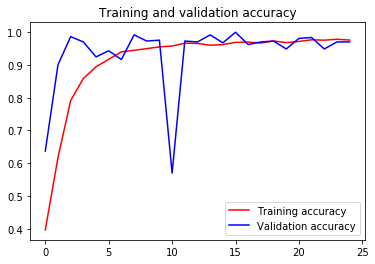

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving istockphoto-1002710360-1024x1024.jpg to istockphoto-1002710360-1024x1024 (5).jpg
Scissors


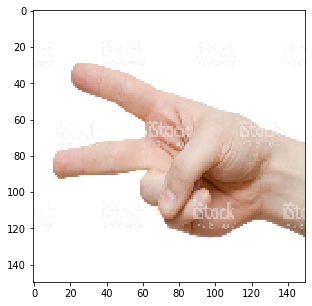

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  plt.figure(figsize=(5,5))
  plt.imshow(img)

  classes = model.predict(images, batch_size=10)
  if(classes[0][0]>classes[0][1]):
    if(classes[0][0]>classes[0][2]):
      print("Paper");
    else:
      print("Scissor")
  else:
    if(classes[0][1]>classes[0][2]):
      print("Rock");
    else:
      print("Scissor")